# analysis of pp-SRC c.m. momentum simulations

# imports and functions

In [1]:
from notebook_tools import *
import ast ,matplotlib.patches as patches
%matplotlib inline

In [2]:
nominal_values=dict({'SigmaT_12C':0.167,'SigmaT_err_12C':0.006,
                     'SigmaX_12C':0.165,'SigmaX_err_12C':0.007,'SigmaY_12C':0.170,'SigmaY_err_12C':0.012,
                     'a1_12C':0.143,'a1_err_12C':0.075,'a2_12C':0.158,'a2_err_12C':0.009,
                     'b1_12C':0.562,'b1_err_12C':0.078,'b2_12C':0.159,'b2_err_12C':0.009,
                     'SigmaZa1_12C':0.143,'SigmaZa1_err_12C':0.075,'SigmaZa2_12C':0.158,'SigmaZa2_err_12C':0.009,
                     'MeanZa1_12C':0.562,'MeanZa1_err_12C':0.078,'MeanZa2_12C':0.159,'MeanZa2_err_12C':0.009})

In [9]:
def add_nominal_values(v1='SigmaT',v2='a1',target='12C',linewidth=2,ax=None):
    nominal_v1 , nominal_v1_err = nominal_values[v1+'_%s'%target],nominal_values[v1+'_err_%s'%target],
    nominal_v2 , nominal_v2_err = nominal_values[v2+'_%s'%target],nominal_values[v2+'_err_%s'%target],
    ax.add_patch( patches.Rectangle((nominal_v1-nominal_v1_err, nominal_v2-nominal_v2_err),    
                                    2*nominal_v1_err, 2*nominal_v2_err,  fill=False, linewidth=linewidth , color='blue'))

   

In [140]:
def calc_PvalTotal(data=None):
    for target in ['12C','27Al','56Fe','208Pb']:
        data['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([
                data['PvalSigmaX_unweighted_%s'%target],                
                data['PvalSigmaY_unweighted_%s'%target],                
                data['PvalSigmaZa1_unweighted_%s'%target],                
                data['PvalSigmaZa2_unweighted_%s'%target],                 
                data['PvalMeanZa1_unweighted_%s'%target],                
                data['PvalMeanZa2_unweighted_%s'%target]                         
            ])


In [49]:
def draw_PvalWeighting(sims=None,
                       var='SigmaX', xlabel='',bins=50,target='12C',name='$^{12}C$',
                       PvalTotWeight=None,legend_loc=None,                       
                       x_range = None, y_range = None,                       
                       x_text = 0.1 , y_text=None,                       
                       figsize=(10,10),                       
                       fontsize=20,
                       weight_defs=None,
                       weighting_labels=None,ax=None):
            
    h_weights , h_weighting_labels = [] , []
    for weight_def,weighting_label in zip(weight_defs,weighting_labels):
        weight = sims[weight_def]
        if np.sum(weight)>0:            
            h_weights.append(weight)
            h_weighting_labels.append(weighting_label)
            mu = np.average(sims['gen'+var] , weights=weight)
            variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
            sigma = np.sqrt(variance)                                                                           
            #             print weighting_label + ': %.3f \pm %.3f'%(mu,sigma)
        else:
            print var + ' ' + weighting_label + ' weights sum up to 0'
        if 'Pval(tot)' in weighting_label:
            mu_PvalTot,sigma_PvalTot = mu,sigma
            
    if ax is None:
        fig,ax=plt.subplots(figsize=(10,10))
        
    plt.hist(sims['gen'+var],label='generated',  bins=bins,normed=1, histtype='step',linewidth=2);
    for weight,weighting_label in zip(h_weights,h_weighting_labels):

        h,bins,_ = plt.hist(sims['gen'+var],
                            weights=weight,
                            label=weighting_label,                
                            bins=bins,
                            normed=1,
                            histtype='step',linewidth=2);
        if 0.7*np.max(h)>y_text: y_text=0.7*np.max(h) 
    set_axes(ax,x_label=xlabel,y_label='',fontsize=fontsize)
    ax.yaxis.set_major_formatter( NullFormatter() )
    if legend_loc is not None:
        plt.legend(fontsize=fontsize-5,loc=legend_loc)    
    ax.set_title('weighted average: $%.3f \pm %.3f$'%(mu_PvalTot,sigma_PvalTot),y=1.02,fontsize=20)
    ax.set_xlim(x_range)
#     plt.text(x_text,y_text,name,fontsize=40)

# read data

In [62]:
sims1M_1400k = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1000000to1400000_results.csv')

In [109]:
sims1600k_1760k = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1600000to1760000_results.csv')

In [141]:
calc_PvalTotal(data=sims100_353)
calc_PvalTotal(data=sims1M_1400k)
calc_PvalTotal(data=sims1600k_1760k)

In [3]:
sims10_72=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs10000to72500_results.csv')

In [36]:
sims100_353=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs100000to353125_results.csv')

In [ ]:
simsall = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs_10kto72.5k_100kto353k_1Mto1.4M_1.6Mto1.76M.csv')

In [128]:
def plot_corrrelations(data = sims10_72,binsy=5,target='12C',weights_def='PvalTotal_unweighted',
                       range_a1=None,range_a2=None,range_b1=None,range_b2=None):
    
    weights = data[weights_def+'_'+target]
    
    fig=plt.figure(figsize=(16,10))    
    ax=fig.add_subplot(2,2,1)
    plot_2d_hist(data.genSigmaX,data.genSigmaZa1,bins=(100,binsy),xlabel='',ylabel='$a_1$', norm='non',
                 weights=weights,ax=ax);
    add_nominal_values('SigmaT','a1',ax=ax)
    ax.grid(linestyle='--',alpha=0.5)
    if range_a1 is not None: ax.set_ylim(range_a1)

    ax=fig.add_subplot(2,2,2)
    plot_2d_hist(data.genSigmaX,data.genSigmaZa2,bins=(100,binsy),
                 xlabel='',ylabel='$a_2$ [GeV/c]', norm='non',
                 weights=weights,ax=ax);
    add_nominal_values('SigmaT','a2',ax=ax)
    ax.grid(linestyle='--',alpha=0.5)
    if range_a2 is not None: ax.set_ylim(range_a2)


    ax=fig.add_subplot(2,2,3)
    plot_2d_hist(data.genSigmaX,data.genMeanZa1,bins=(100,binsy),    
                 xlabel='$\\sigma_t$ [GeV/c]',ylabel='$b_1$', norm='non',
                 weights=weights,ax=ax);
    add_nominal_values('SigmaT','b1',ax=ax)
    ax.grid(linestyle='--',alpha=0.5)
    if range_b1 is not None: ax.set_ylim(range_b1)


    ax=fig.add_subplot(2,2,4)
    plot_2d_hist(data.genSigmaX,data.genMeanZa2,bins=(100,binsy),
                 xlabel='$\\sigma_t$ [GeV/c]',ylabel='$b_2$ [GeV/c]', norm='non',
                 weights=weights,ax=ax);
    add_nominal_values('SigmaT','b2',ax=ax)
    ax.grid(linestyle='--',alpha=0.5)
    if range_b2 is not None: ax.set_ylim(range_b2)

    plt.subplots_adjust(wspace=0.3)

# correlation with 𝜎_t for multiple runs

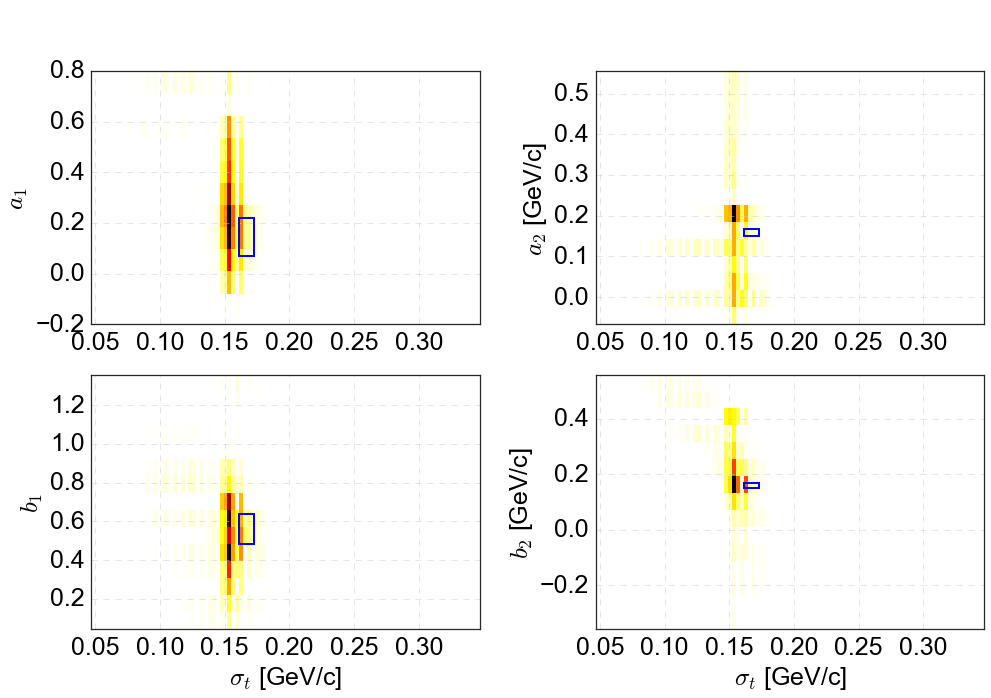

In [137]:
plot_corrrelations(data=simsall[simsall.genSigmaZa2>-0.1],binsy=15,range_a1=(-0.2,0.8)) 

# Zoom-in: a subset used for acceptance correction of the longitudinal parameters  

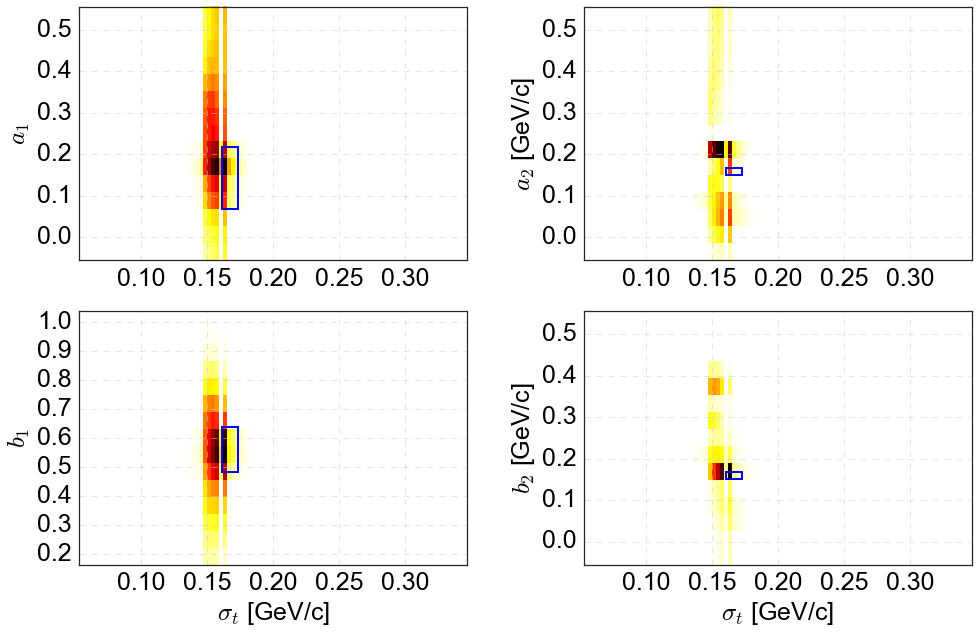

In [59]:
# sims10_72_100_353 = pd.concat([sims10_72,sims100_353])
plot_corrrelations(data = sims10_72_100_353,binsy=15)

# Zoom-in: Zoom in: a subset used for acceptance correction of the transverse parameter  𝜎_t  

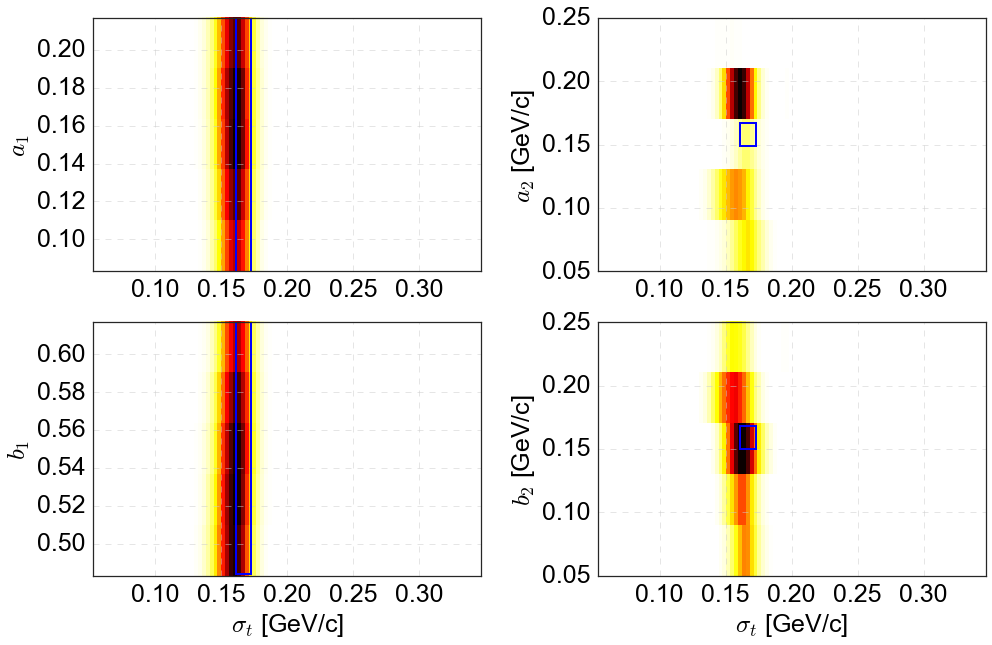

In [11]:
plot_corrrelations(data = sims10_72)

--------------
	12C 
--------------
--------------
	27Al 
--------------
--------------
	56Fe 
--------------
--------------
	208Pb 
--------------


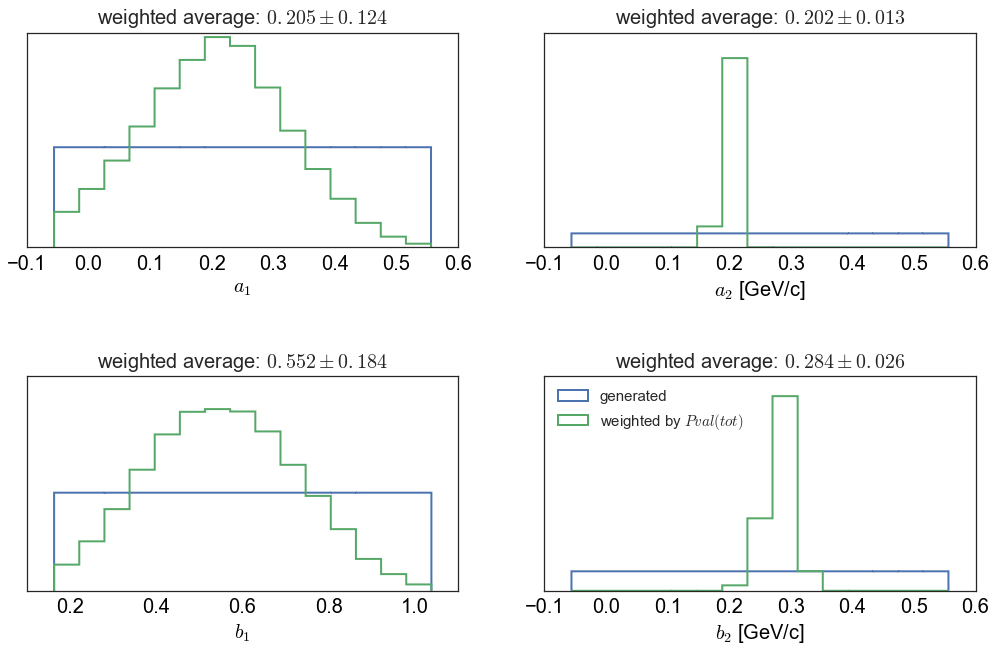

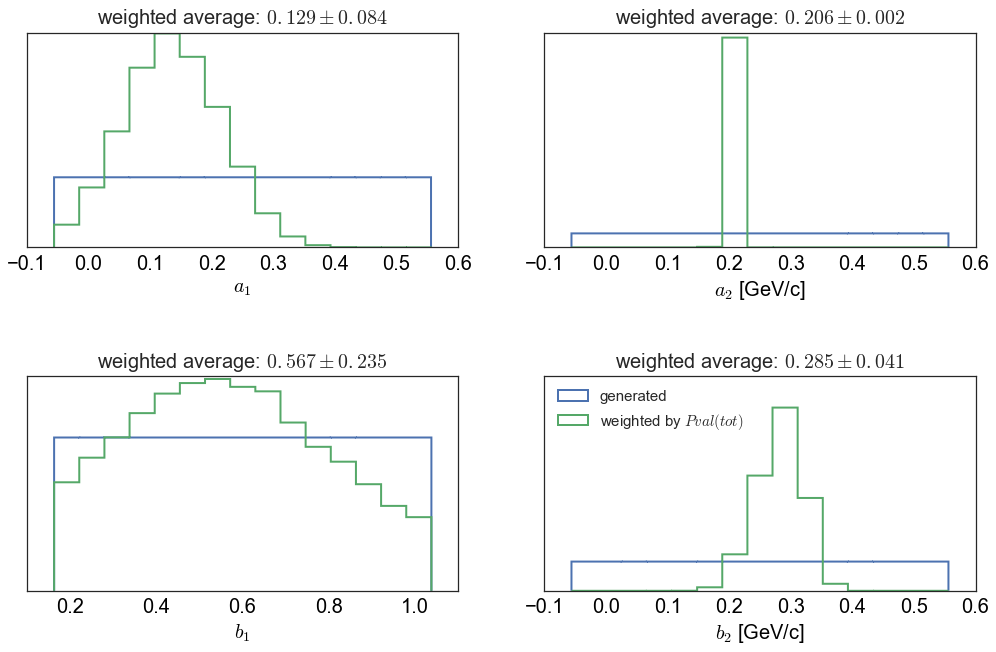

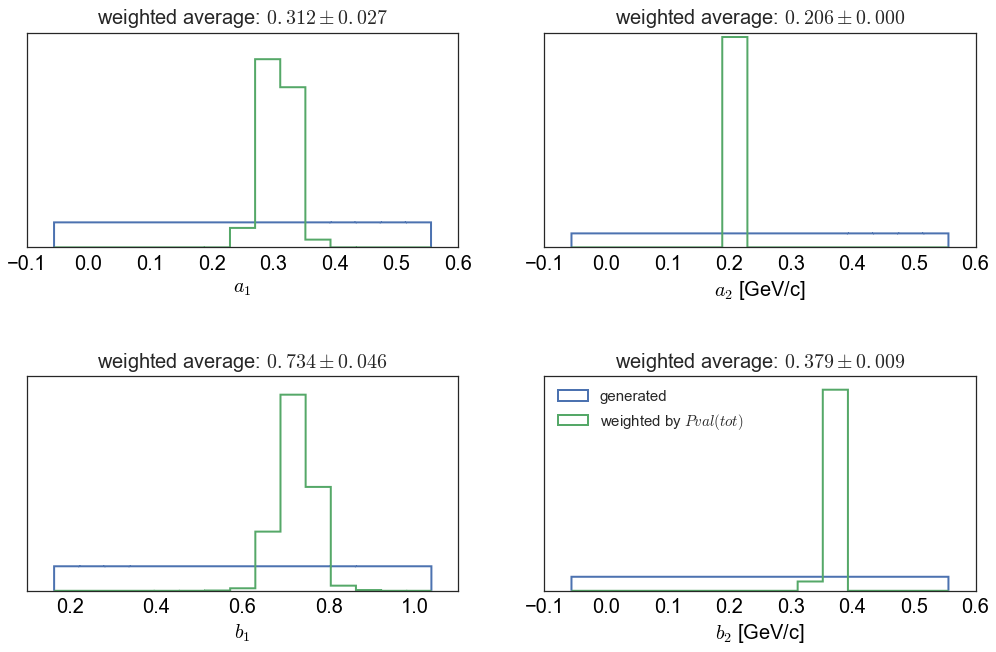

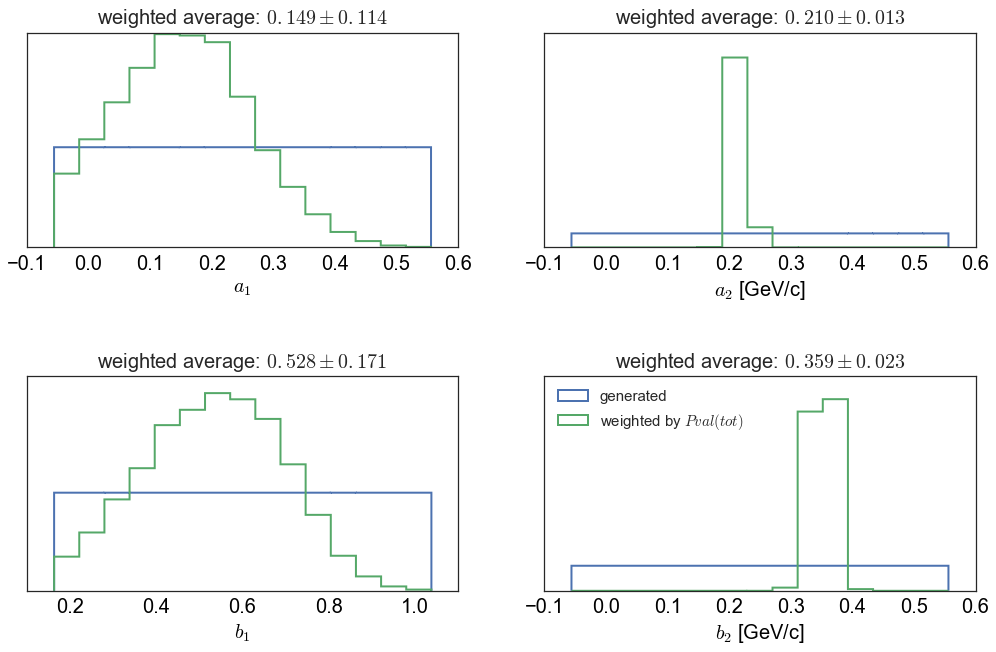

In [142]:
# simsreduced = simsall[(simsall.run>1000000) & (simsall.run<1400000)]
for target,name in zip(['12C','27Al','56Fe','208Pb']
                       ,['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']
                      ):
    print '--------------\n\t',target,'\n--------------'    

    weight_defs=[ 'PvalTotal_'+target ]
    weighting_labels = ['weighted by $Pval(tot)$']

    fig=plt.figure(figsize=(17,10))
    ax=fig.add_subplot(2,2,1)
    draw_PvalWeighting(sims=sims100_353,var='SigmaZa1',xlabel='$a_{1}$',
                       bins=15, x_range=(-0.1,0.6),
                       target=target,name=name,weight_defs=weight_defs,weighting_labels=weighting_labels,ax=ax)


    ax=fig.add_subplot(2,2,2)
    draw_PvalWeighting(sims=sims100_353,var='SigmaZa2',xlabel='$a_{2}$ [GeV/c]',
                       bins=15, x_range=(-0.1,0.6),
                       target=target,name=name,weight_defs=weight_defs,weighting_labels=weighting_labels,ax=ax)

    
    ax=fig.add_subplot(2,2,3)
    draw_PvalWeighting(sims=sims100_353,var='MeanZa1',xlabel='$b_{1}$',
                       bins=15,x_range=(0.1,1.1),
                       target=target,name=name,weight_defs=weight_defs,weighting_labels=weighting_labels,ax=ax)
   
    ax=fig.add_subplot(2,2,4)
    draw_PvalWeighting(sims=sims100_353,var='MeanZa2',xlabel='$b_{2}$ [GeV/c]',
                       bins=15,x_range=(-0.1,0.6),legend_loc='upper left',
                       target=target,name=name,weight_defs=weight_defs,weighting_labels=weighting_labels,ax=ax)

    plt.subplots_adjust(hspace=0.6,wspace=0.2)

# reanalysis

In [121]:
                 
# sims1M_1400k    
# calc_PvalTotal(data=sims1600k_1760k)
Nmax=-1
for i,row in sims1600k_1760k[0:Nmax].iterrows():
    if i%4000==0: print '%.0f'%(100.*float(i)/len(sims1600k_1760k[0:Nmax]))+'%'
    for target in ['12C']:
        row['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([Pval2varsAssumeGausDist_pandas(nominal_values['SigmaX_'+target] , 
                                                                                                     nominal_values['SigmaX_err_'+target] ,
                                                                                                     row['recSigmaX_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['SigmaY_'+target] , 
                                                                                                     nominal_values['SigmaY_err_'+target] ,
                                                                                                     row['recSigmaY_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['SigmaZa1_'+target] , 
                                                                                                     nominal_values['SigmaZa1_err_'+target] ,
                                                                                                     row['recSigmaZa1_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['SigmaZa2_'+target] , 
                                                                                                     nominal_values['SigmaZa2_err_'+target] ,
                                                                                                     row['recSigmaZa2_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['MeanZa1_'+target] , 
                                                                                                     nominal_values['MeanZa1_err_'+target] ,
                                                                                                     row['recMeanZa1_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['MeanZa2_'+target] , 
                                                                                                     nominal_values['MeanZa2_err_'+target] ,
                                                                                                     row['recMeanZa2_unweighted'] , 0 )
                                                                  ])
print 'done.'

0%
3%
5%
8%
10%
13%
15%
18%
20%
23%
25%
28%
30%
33%
35%
38%
40%
43%
45%
48%
50%
53%
55%
58%
60%
63%
65%
68%
70%
73%
75%
78%
80%
83%
85%
88%
90%
93%
95%
98%
done.


In [205]:
def Pval2varsAssumeGausDist_pandas( v1 , v1Err , v2 , v2Err , debug=0 , name=''):
#     xmin , xmax = v2-v2Err , infty
    high_integral , integral_err = GaussianIntegral( v2-v2Err , infty , args=(v1,v1Err) )
    low_integral , integral_err = GaussianIntegral( -infty , v2+v2Err , args=(v1,v1Err) )
    return high_integral+low_integral



